## Water Scarcity

This expermient investigates the proportion of withdrawn freshwater in relation to the available renewable freshwater. A substantial share of withdrawn freshwater could suggest existing or potential water scarcity issues.

In [1]:
from tueplots import bundles
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.colors import LinearSegmentedColormap
import sys
import os

# reset default plot settings
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update(bundles.icml2022())
plt.rcParams.update({"figure.dpi": 200})

sys.path.insert(1, os.path.abspath(os.getcwd()[:-3]))

First we create a custom colormap ranging from blue to red

In [2]:
# create custom color map

RGB1 = [0, 0, 150]  # dark blue
RGB2 = [150, 0, 0]  # dark red

N = 256  #number of discrete levels
vals = np.ones((N, 4))

vals[:, 0] = np.linspace(RGB1[0] / 256, RGB2[0] / 256, N)
vals[:, 1] = np.linspace(RGB1[1] / 256, RGB2[1] / 256, N)
vals[:, 2] = np.linspace(RGB1[2] / 256, RGB2[2] / 256, N)

# finally, create the required colormap that ranges from
# -- dark blue to pale green
custom_cmap = ListedColormap(vals)

custom_cmap = LinearSegmentedColormap.from_list(
    "rb", [[0, 0, 153 / 255, 1], [51 / 255, 133 / 255, 220 / 255, 1], [220 / 255, 0 / 255, 0, 1], [128 / 255, 0, 0, 1]],
    N=500
)

### Import FAO Aquastat Data ###
----------------------------------------------------------
Source: FAO - Aquastat

Timespan: 1964 to 2020

Countries: 200+

Variables: 180+

----------------------------------------------------------

Next, we import the data from the FOA Aquastat dataset and extract the variable "MDG 7.5. Freshwater withdrawal as % of total renewable water resources"

In [3]:
from src.aquastat_utils import get_aquastat

df = get_aquastat()

Getting AQUASTAT dataframe from fao_aquastat.csv ...
/Users/josef/projects/test/team-aqua/src/../dat/fao_aquastat.csv already exists.
Getting AQUASTAT dataframe from fao_aquastat.csv ...
/Users/josef/projects/test/team-aqua/src/../dat/fao_aquastat.csv already exists.
Renaming countries ...


Finally, we plot the variable on a global map to obtain an overview of the water scarcity situation of different countries.

Saving figure to fig/water_management/fig_world_map_MDG_7.5._Freshwater_withdrawal_as_%_of_total_renewable_water_resources_2020.pdf ... Done!


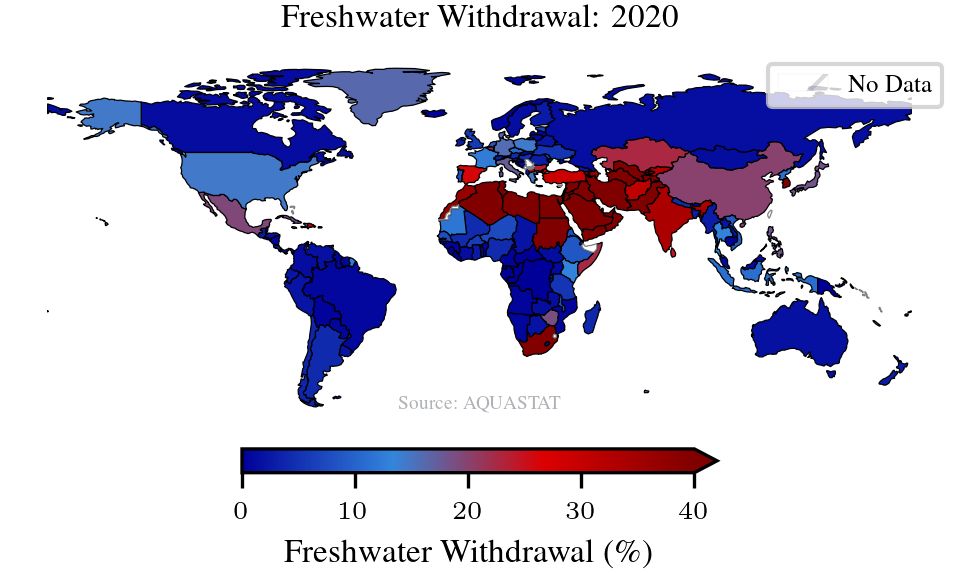

(<Figure size 975x602.583 with 2 Axes>,
 <Axes: title={'center': 'Freshwater Withdrawal: 2020'}>)

In [4]:
'''Plot a map visualizing the Freshwater withdrawal (%)'''
from src.aquastat_plot import plot_world

year = 2020
variable = "MDG 7.5. Freshwater withdrawal as % of total renewable water resources"
title = 'Freshwater Withdrawal: {}'.format(year)
plot_world(df, variable=variable, year=year, title=title, cmap=custom_cmap, label='Freshwater Withdrawal (\%)',
           vmin_max=[0, 40])

We observe, that there are quite alot of countries who seem to withdraw more than 30% of the renewable water resources available. This is a high rate, since the renewable water resource variable already accounts for renewable ground- and surface water. Especially countries in Northern Africa, the Arabian Peninsula and the Middle East seem to have water scarcity issues. Also South Africa is impacted.
Some of these countries are already implementing restrictive measures to conserve water.

Saving figure to fig/water_management/fig_world_map_SDG_6.4.2._Water_Stress_2020.pdf ... Done!


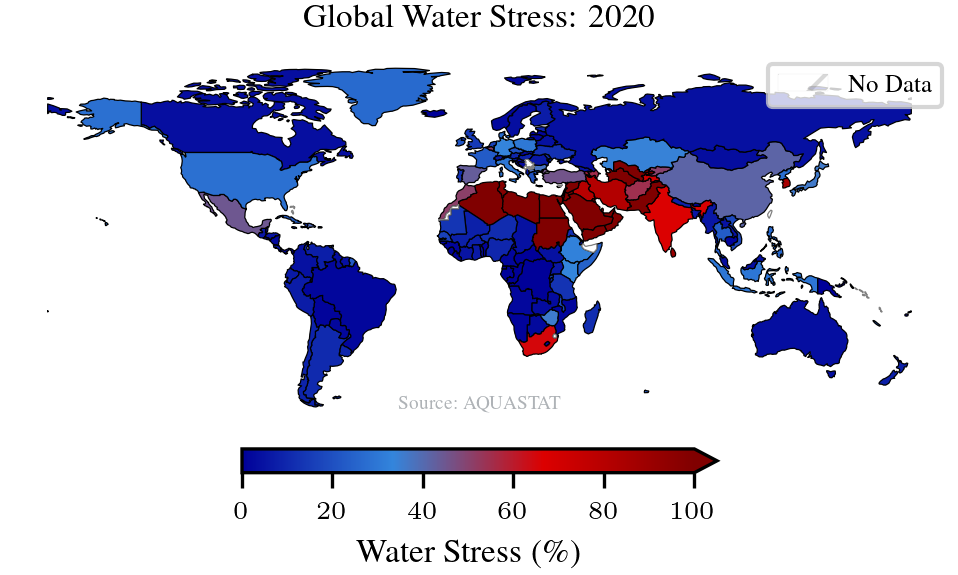

(<Figure size 975x602.583 with 2 Axes>,
 <Axes: title={'center': 'Global Water Stress: 2020'}>)

In [5]:
from src.aquastat_plot import plot_world

year = 2020
variable = "SDG 6.4.2. Water Stress"
title = 'Global Water Stress: {}'.format(year)
plot_world(df, year=year, variable=variable, title=title, cmap=custom_cmap, label='Water Stress (\%)',
           vmin_max=[0, 100])